In [57]:
# Loading packages

import numpy as np
import pandas as pd 
from sklearn import preprocessing
import sklearnmetrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Setting options for pandas
pd.set_option('max_columns', 500)
pd.set_option('max_rows', 500)

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]

SyntaxError: invalid syntax (<ipython-input-57-80804a01e031>, line 6)

In [3]:
#Importing data
df = pd.read_excel (r'C:\Users\DANIEL\Documents\DataScience\data\dataset.xlsx')
#df = pd.read_excel (r'Path where the Excel file is stored\File name.xlsx')

In [4]:
# Analysing dimensions of the data
df.shape

(5644, 111)

In [5]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
# Summary of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [7]:
 #Datatypes of columns

df.dtypes.sort_values(axis=0)

Patient age quantile                                       int64
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
ctO2 (arterial blood gas analysis)                       float64
Alkaline phosphatase                                     float64
Indirect Bilirubin                                       float64
Direct Bilirubin                                         float64
Total Bilirubin                                          float64
Gamma-glutamyltransferase                                float64
Aspartate transaminase                                   float64
Relationship (Patient/Normal)                            float64
Partial thromboplastin time (PTT)                        float64
Ionized calcium                                          float64
Sodium                                                   float64
Potassium                

In [8]:
# Looking at missing values percentage for each column

(df.isnull().sum()/df.shape[0] * 100).sort_values(axis=0, ascending=False, inplace=False, kind='quicksort')

Prothrombin time (PT), Activity                          100.000000
D-Dimer                                                  100.000000
Mycoplasma pneumoniae                                    100.000000
Urine - Sugar                                            100.000000
Partial thromboplastin time (PTT)                        100.000000
Fio2 (venous blood gas analysis)                          99.982282
Urine - Nitrite                                           99.982282
Vitamin B12                                               99.946846
Lipase dosage                                             99.858257
Albumin                                                   99.769667
Phosphor                                                  99.645641
Arteiral Fio2                                             99.645641
Ferritin                                                  99.592488
Base excess (arterial blood gas analysis)                 99.521616
pO2 (arterial blood gas analysis)               

In [9]:
columns_all_missing = (df.isnull().sum()/df.shape[0] * 100).sort_values(axis=0, ascending=False, inplace=False, kind='quicksort').index.to_list()[:5]
columns_all_missing

['Prothrombin time (PT), Activity',
 'D-Dimer',
 'Mycoplasma pneumoniae',
 'Urine - Sugar',
 'Partial thromboplastin time\xa0(PTT)\xa0']

In [10]:
# Dropping values with complete missingness
df.drop(columns = columns_all_missing, axis = 1, inplace = True)

In [11]:
# Dropping Patient ID column as it is unlikely to contain insight
df.drop(columns = 'Patient ID',axis = 1, inplace = True)

In [12]:
# Constant value columns

constant_cols = df.columns[df.nunique() <= 1].to_list()
df.drop(columns = constant_cols, axis = 1, inplace = True)

In [14]:
# Target variable

# It has no missingness (above)

# Checking if target is balanced or imbalanced
df['SARS-Cov-2 exam result'].value_counts()

# Target is imbalanced

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

In [16]:
# List of categorical columns separately

categorical_columns = list(df.select_dtypes(include=['object']).columns)

# Looking at the values in categorical columns, so as to be able to convert them to numerical later on
for each in categorical_columns:
    print(df[each].value_counts())
    print("\n")

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64


not_detected    1302
detected          52
Name: Respiratory Syncytial Virus, dtype: int64


not_detected    1336
detected          18
Name: Influenza A, dtype: int64


not_detected    1277
detected          77
Name: Influenza B, dtype: int64


not_detected    1349
detected           3
Name: Parainfluenza 1, dtype: int64


not_detected    1307
detected          45
Name: CoronavirusNL63, dtype: int64


not_detected    973
detected        379
Name: Rhinovirus/Enterovirus, dtype: int64


not_detected    1332
detected          20
Name: Coronavirus HKU1, dtype: int64


not_detected    1342
detected          10
Name: Parainfluenza 3, dtype: int64


not_detected    1343
detected           9
Name: Chlamydophila pneumoniae, dtype: int64


not_detected    1339
detected          13
Name: Adenovirus, dtype: int64


not_detected    1333
detected          19
Name: Parainfluenza 4, dtype: int64


not_detected    1343
detect

In [18]:
# One-hot encoding would further increase dimensionality of data further, so will use integer encoding

df = df.replace({'detected': 1, 'not_detected':0})
df = df.replace({'positive': 1, 'negative': 0})
df = df.replace({'absent': 0, 'present': 1, 'not_done': 2})
df = df.replace({'clear': 0, 'cloudy': 1, 'lightly_cloudy': 2, 'altered_coloring': 3})
df = df.replace({'Não Realizado': 0})
df = df.replace({'normal': 0})
df = df.replace({'<1000': 1000})
df = df.replace({'Ausentes': 0, 'Urato Amorfo --+': 1, 'Urato Amorfo +++': 2, 'Oxalato de Cálcio -++': 3, 'Oxalato de Cálcio +++': 4})
df = df.replace({'yellow': 0, 'light_yellow': 1, 'citrus_yellow': 2, 'orange': 4})

In [19]:
# Columns: Urine - Leukocytes and Urine - pH can be converted to float datatype

df['Urine - Leukocytes'] = df['Urine - Leukocytes'].astype(float)
df['Urine - pH'] = df['Urine - pH'].astype(float)

In [22]:
# Reviewing datatypes again

df.dtypes.sort_values(axis=0)

# Columns are either int or float now

Patient age quantile                                       int64
SARS-Cov-2 exam result                                     int64
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Urine - Ketone Bodies                                    float64
Urine - Bile pigments                                    float64
Urine - Hemoglobin                                       float64
Urine - pH                                               float64
Urine - Aspect                                           float64
Urine - Esterase                                         float64
Myelocytes                                               float64
Metamyelocytes                                           float64
Promyelocytes                                            float64
HCO3 (venous blood gas analysis)                         float64
Rods #                   

In [23]:
# Filling-in missing values with a different and distant value than present in dataset

df.fillna(-99999, inplace = True)

In [24]:
# Checking missingness

df.isna().sum()

# No missingness now

Patient age quantile                                     0
SARS-Cov-2 exam result                                   0
Patient addmited to regular ward (1=yes, 0=no)           0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0
Patient addmited to intensive care unit (1=yes, 0=no)    0
Hematocrit                                               0
Hemoglobin                                               0
Platelets                                                0
Mean platelet volume                                     0
Red blood Cells                                          0
Lymphocytes                                              0
Mean corpuscular hemoglobin concentration (MCHC)         0
Leukocytes                                               0
Basophils                                                0
Mean corpuscular hemoglobin (MCH)                        0
Eosinophils                                              0
Mean corpuscular volume (MCV)                           

In [25]:
# Even without further domain knowledge we can still drop columns that would usually not impact diagnosis or the patient being affected

df.drop(columns = ['Patient addmited to regular ward (1=yes, 0=no)', 'Patient addmited to semi-intensive unit (1=yes, 0=no)', 'Patient addmited to intensive care unit (1=yes, 0=no)'], axis = 1, inplace = True)

In [26]:
# Preparing dataframes for modelling

x = df.drop(columns = 'SARS-Cov-2 exam result', axis = 1, inplace = False)

# The target variable
y = df['SARS-Cov-2 exam result']

In [27]:
column_names = x.columns.to_list()

In [28]:
# Normalising the data
x = preprocessing.normalize(x, norm='max', axis=0).reshape(x.shape)

# Converting to dataframe
x = pd.DataFrame(x, columns = column_names)

# Shuffling the data
x, y = shuffle(x, y, random_state = 100)  # shuffle the data

In [29]:
# Splitting data using 70% as training data and 30% as test data

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100, stratify = y)

In [30]:
# Inspecting the training and test data sets

print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(1694, 94)
(3950, 94)
(1694,)
(3950,)


In [31]:
# Fitting a Naive Bayes model

# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
# Predicting using the naive Bayes model

y_pred = gnb.predict(X_test)

In [33]:
# Analysing quality of classifier 

print("Accuracy of Naive Bayes classifier:",metrics.accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))

Accuracy of Naive Bayes classifier: 0.8258559622195986

Confusion Matrix:
 [[1378  149]
 [ 146   21]]


In [34]:
# Fitting a Random forests classifier

# Create a Gaussian Classifier
rm_clf = RandomForestClassifier(n_estimators = 100, random_state=10)

# Train the model using the training sets y_pred=clf.predict(X_test)
rm_clf = rm_clf.fit(X_train,y_train)

In [35]:
# Making predictions
y_pred_randomforests = rm_clf.predict(X_test)

In [36]:
# Analysing quality of classifier 

print("Accuracy of Random Forests classifier:",metrics.accuracy_score(y_test, y_pred_randomforests ))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred_randomforests ))

Accuracy of Random Forests classifier: 0.9025974025974026

Confusion Matrix:
 [[1524    3]
 [ 162    5]]


In [37]:
# Support Vector clasifier

svc = SVC(random_state=10)
svc.fit(X_train, y_train)

C:\Users\DANIEL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=10,
    shrinking=True, tol=0.001, verbose=False)

In [38]:
# Making predictions
y_pred_svc = svc.predict(X_test)

In [39]:
# Analysing quality of classifier 

print("Accuracy of Random Forests classifier:",metrics.accuracy_score(y_test, y_pred_svc ))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred_svc ))

Accuracy of Random Forests classifier: 0.9020070838252656

Confusion Matrix:
 [[1526    1]
 [ 165    2]]


In [61]:
!pip install --upgrade sklearn 

Requirement already up-to-date: sklearn in c:\users\daniel\anaconda3\lib\site-packages (0.0)


In [109]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 0.21.2.


In [80]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\daniel\anaconda3\lib\site-packages (0.22.2.post1)
Note: you may need to restart the kernel to use updated packages.


In [112]:
pip install -U scikit-learn==0.22

Requirement already up-to-date: scikit-learn==0.22 in c:\users\daniel\anaconda3\lib\site-packages (0.22)
Note: you may need to restart the kernel to use updated packages.


AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

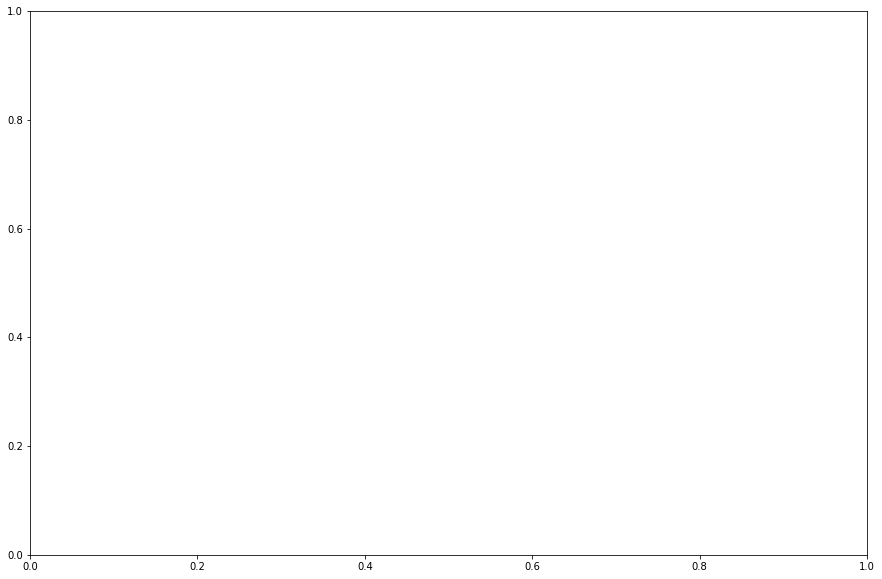

In [113]:
ax = plt.gca()
metrics.plot_roc_curve(rm_clf, X_test, y_test, ax=ax, alpha=0.8)
metrics.plot_roc_curve(gnb, X_test, y_test, ax=ax, alpha=0.8)
metrics.plot_roc_curve(svc, X_test, y_test, ax=ax, alpha=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show() 